## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [3]:
filterwarnings('ignore')

## Import Dataset

In [4]:
data = pd.read_csv("bodyPerformance.csv")
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


## Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


#### Reducing the size of the dataset for better computations

In [6]:
data["gender"] = data["gender"].astype('category')
data["class"] = data["class"].astype('category')
data.insert(0, "gender", data.pop("gender"))
data.iloc[:, 1:-1] = data.iloc[:, 1:-1].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   13393 non-null  category
 1   age                      13393 non-null  float32 
 2   height_cm                13393 non-null  float32 
 3   weight_kg                13393 non-null  float32 
 4   body fat_%               13393 non-null  float32 
 5   diastolic                13393 non-null  float32 
 6   systolic                 13393 non-null  float32 
 7   gripForce                13393 non-null  float32 
 8   sit and bend forward_cm  13393 non-null  float32 
 9   sit-ups counts           13393 non-null  float32 
 10  broad jump_cm            13393 non-null  float32 
 11  class                    13393 non-null  category
dtypes: category(2), float32(10)
memory usage: 549.8 KB


#### Label encoding the `gender` column

In [7]:
data["gender"] = data["gender"].map({
    'M':1,
    'F':0
}).astype('int8')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   13393 non-null  int8    
 1   age                      13393 non-null  float32 
 2   height_cm                13393 non-null  float32 
 3   weight_kg                13393 non-null  float32 
 4   body fat_%               13393 non-null  float32 
 5   diastolic                13393 non-null  float32 
 6   systolic                 13393 non-null  float32 
 7   gripForce                13393 non-null  float32 
 8   sit and bend forward_cm  13393 non-null  float32 
 9   sit-ups counts           13393 non-null  float32 
 10  broad jump_cm            13393 non-null  float32 
 11  class                    13393 non-null  category
dtypes: category(1), float32(10), int8(1)
memory usage: 549.6 KB


## Explorary Data Analysis

#### `height` vs `age` scatterplot with repect to `gender`

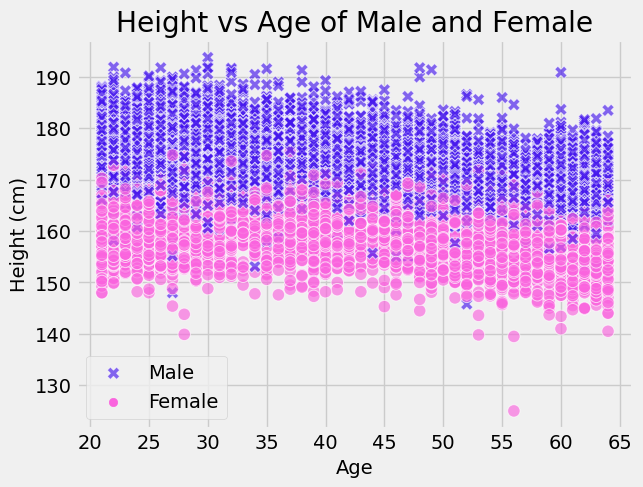

In [9]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x = "age", y = "height_cm", data = data, style = "gender",hue = "gender", alpha = 0.65, palette = ["#fa64de", "#4618ed"], s = 80)
plt.legend(labels = ("Male", "Female"))
plt.title("Height vs Age of Male and Female")
plt.xlabel("Age")
plt.ylabel("Height (cm)")
plt.xticks(ticks = np.arange(20, 70, 5))
plt.show()

`Gained insights` : **Males are usually taller than Females**

#### 

#### `Weight` vs `age` scatterplot with repect to `gender`

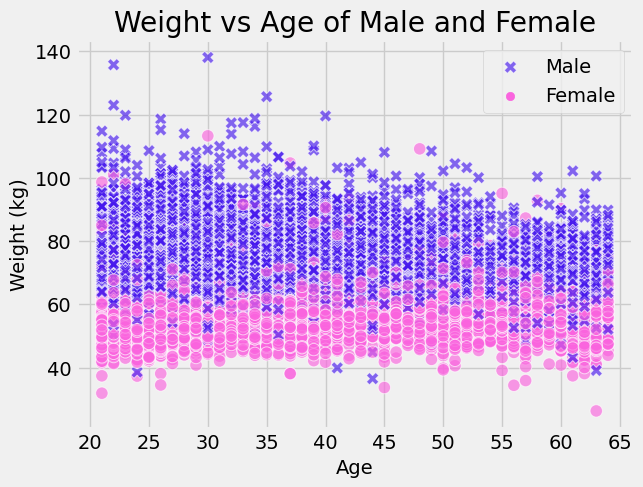

In [10]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x = "age", y = "weight_kg", data = data, style = "gender",hue = "gender", alpha = 0.65, palette = ["#fa64de", "#4618ed"], s = 80)
plt.legend(labels = ("Male", "Female"))
plt.title("Weight vs Age of Male and Female")
plt.xlabel("Age")
plt.ylabel("Weight (kg)")
plt.xticks(ticks = np.arange(20, 70, 5))
plt.show()

`Gained insights` : **Males are usually more weighted than Females**

#### `Body fat` vs `Age` scatterplot with repect to `Gender`

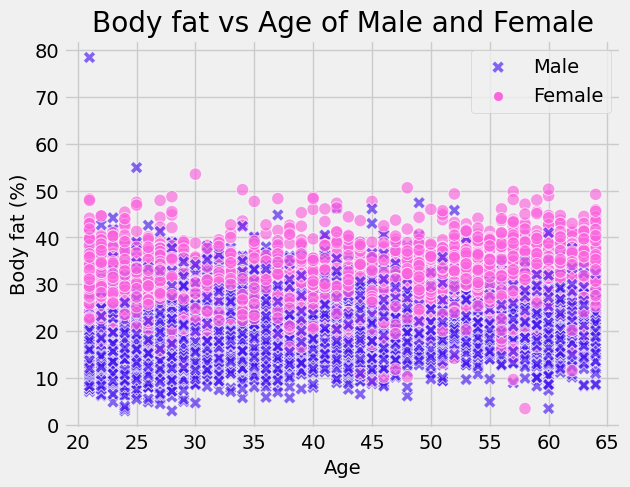

In [11]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x = "age", y = "body fat_%", data = data, style = "gender",hue = "gender", alpha = 0.65, palette = ["#fa64de", "#4618ed"], s = 80)
plt.legend(labels = ("Male", "Female"))
plt.title("Body fat vs Age of Male and Female")
plt.xlabel("Age")
plt.ylabel("Body fat (%)")
plt.xticks(ticks = np.arange(20, 70, 5))
plt.show()

`Gained insights` : **Feales are usually having higher body fat % than Males**

#### `Systolic blood pressure` with respect to `Gender`

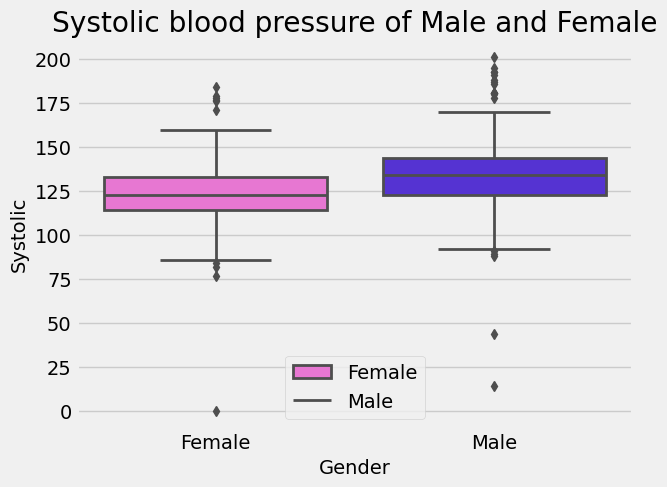

In [12]:
plt.style.use("fivethirtyeight")
sns.boxplot(x = "gender", y = "systolic", data = data, palette = ["#fa64de", "#4618ed"], linewidth = 2, )
plt.legend(labels = ("Female", "Male"))
plt.title("Systolic blood pressure of Male and Female")
plt.xlabel("Gender")
plt.ylabel("Systolic")
plt.xticks(ticks = (0, 1), labels = ("Female", "Male"))
plt.show()

`Gained insights` : **Systolic Blood Pressure is usually higher for Males than Females**

`Outliers are present for systolic blood pressure !`

### `Diastolic blood pressure` with respect to `Gender`

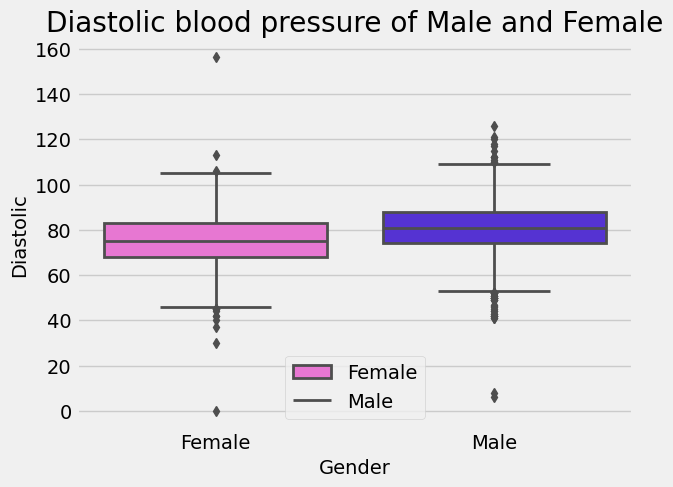

In [13]:
plt.style.use("fivethirtyeight")
sns.boxplot(x = "gender", y = "diastolic", data = data, palette = ["#fa64de", "#4618ed"], linewidth = 2, )
plt.legend(labels = ("Female", "Male"), loc = "lower center")
plt.title("Diastolic blood pressure of Male and Female")
plt.xlabel("Gender")
plt.ylabel("Diastolic")
plt.xticks(ticks = (0, 1), labels = ("Female", "Male"))
plt.show()

`Gained insights` : **Diastolic Blood Pressure is usually higher for Males than Females**

`Outliers are present for diastolic blood pressure !`

#### Handling outliers

In [14]:
diastolic_mean = data["diastolic"].mean()
data["diastolic"] = pd.Series(np.where(data["diastolic"]<=45, diastolic_mean, data["diastolic"]))

In [15]:
systolic_mean = data["systolic"].mean()
data["systolic"] = pd.Series(np.where(data["systolic"]<=45, systolic_mean, data["systolic"]))

#### `Grip Force` with respect to `Gender`

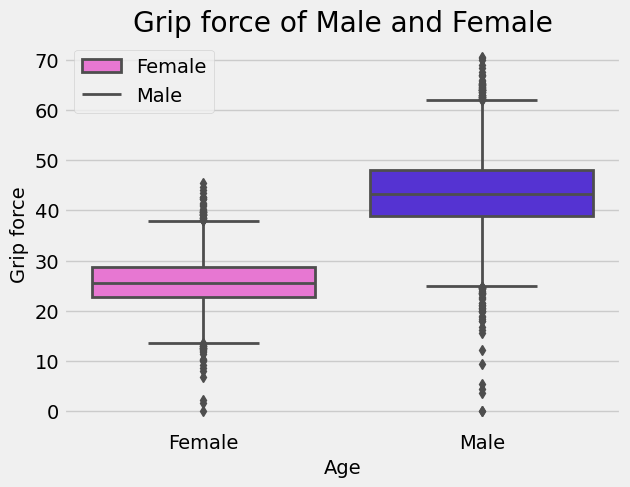

In [16]:
plt.style.use("fivethirtyeight")
sns.boxplot(x = "gender", y = "gripForce", data = data, palette = ["#fa64de", "#4618ed"], linewidth = 2, )
plt.legend(labels = ("Female", "Male"))
plt.title("Grip force of Male and Female")
plt.xlabel("Age")
plt.ylabel("Grip force")
plt.xticks(ticks = (0, 1), labels = ("Female", "Male"))
plt.show()

`Gained insights` : **Grip force is usually higher for Males than Females**

#### Handling outliers

In [17]:
grip_mean = data["gripForce"].mean()
data["gripForce"] = pd.Series(np.where(data["gripForce"]<=15, grip_mean, data["gripForce"]))

### `sit and bend forward_cm` with respect to `Gender`

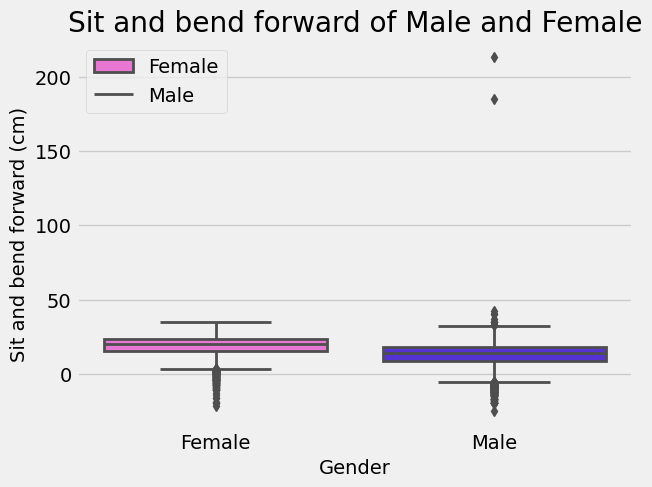

In [18]:
plt.style.use("fivethirtyeight")
sns.boxplot(x = "gender", y = "sit and bend forward_cm", data = data, palette = ["#fa64de", "#4618ed"], linewidth = 2, )
plt.legend(labels = ("Female", "Male"))
plt.title("Sit and bend forward of Male and Female")
plt.xlabel("Gender")
plt.ylabel("Sit and bend forward (cm)")
plt.xticks(ticks = (0, 1), labels = ("Female", "Male"))
plt.show()

#### Handling outliers

In [19]:
data["sit and bend forward_cm"] = pd.Series(np.where(data["sit and bend forward_cm"]>= 42, 40, data["sit and bend forward_cm"]))

### `Sit up counts` with respect to `Gender`

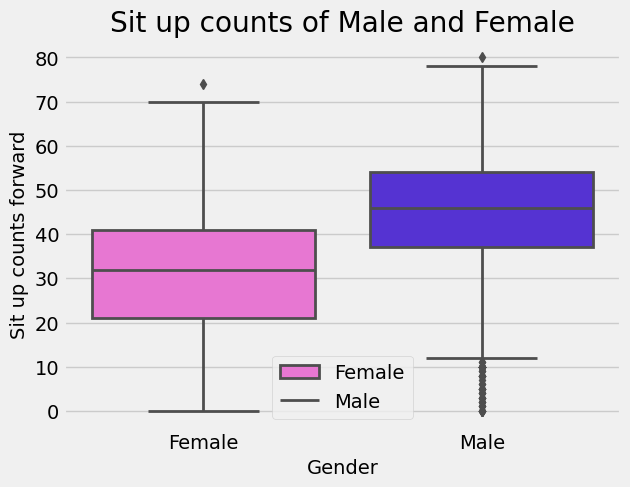

In [20]:
plt.style.use("fivethirtyeight")
sns.boxplot(x = "gender", y = "sit-ups counts", data = data, palette = ["#fa64de", "#4618ed"], linewidth = 2, )
plt.legend(labels = ("Female", "Male"))
plt.title("Sit up counts of Male and Female")
plt.xlabel("Gender")
plt.ylabel("Sit up counts forward")
plt.xticks(ticks = (0, 1), labels = ("Female", "Male"))
plt.show()

`Gained insights` : **Males usually do more sit ups than Females**

#### `Broad jump (cm)` with respect to `Gender`

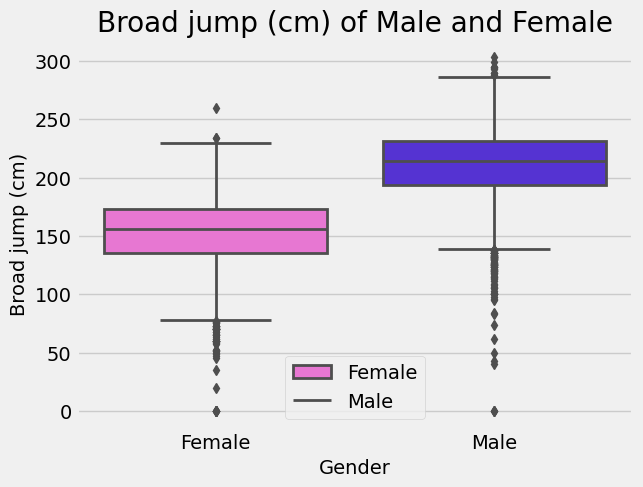

In [21]:
plt.style.use("fivethirtyeight")
sns.boxplot(x = "gender", y = "broad jump_cm", data = data, palette = ["#fa64de", "#4618ed"], linewidth = 2, )
plt.legend(labels = ("Female", "Male"))
plt.title("Broad jump (cm) of Male and Female")
plt.xlabel("Gender")
plt.ylabel("Broad jump (cm)")
plt.xticks(ticks = (0, 1), labels = ("Female", "Male"))
plt.show()

### Correlation Matrix

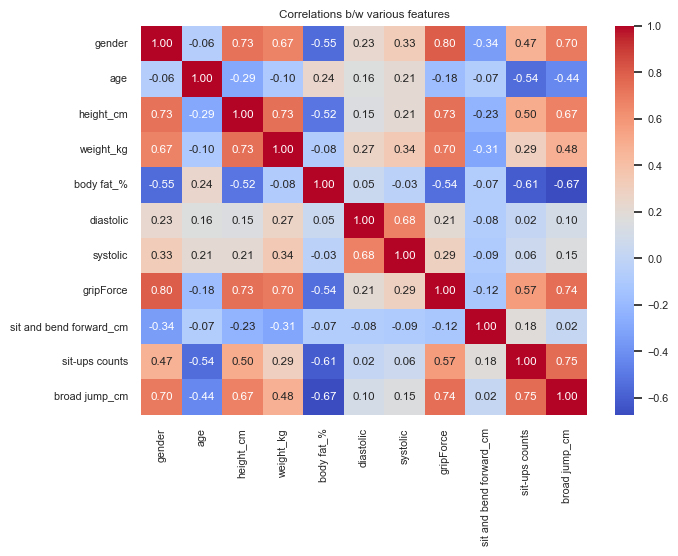

In [22]:
plt.style.use("fivethirtyeight")
sns.set(font_scale = 0.7)
sns.heatmap(data.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlations b/w various features")
plt.show()

## `Feature` and `Label`

In [23]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1, 1)

## Label Encdoing the Target variable

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

## `Train` and `Test set` split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

## Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 1)
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1, multi_class='multinomial')

In [28]:
Y_pred = log_reg.predict(X_test)

In [29]:
print(f"Accuracy : {accuracy_score(Y_test, Y_pred): .3f}")
print(f"Precision : {precision_score(Y_test, Y_pred, average = 'macro'): .3f}")
print(f"Recall : {recall_score(Y_test, Y_pred, average = 'macro'): .3f}")

Accuracy :  0.635
Precision :  0.630
Recall :  0.634


## RandomForest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, criterion = 'gini', n_jobs = -1)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [31]:
Y_pred = rf.predict(X_test)

In [32]:
print(f"Accuracy : {accuracy_score(Y_test, Y_pred): .3f}")
print(f"Precision : {precision_score(Y_test, Y_pred, average = 'macro'): .3f}")
print(f"Recall : {recall_score(Y_test, Y_pred, average = 'macro'): .3f}")

Accuracy :  0.752
Precision :  0.754
Recall :  0.752


## XGBoost

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [34]:
Y_pred = xgb.predict(X_test)

In [35]:
print(f"Accuracy : {accuracy_score(Y_test, Y_pred): .3f}")
print(f"Precision : {precision_score(Y_test, Y_pred, average = 'macro'): .3f}")
print(f"Recall : {recall_score(Y_test, Y_pred, average = 'macro'): .3f}")

Accuracy :  0.760
Precision :  0.763
Recall :  0.760


## CatBoost

In [36]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier(verbose = 0)
ctb.fit(X_train, Y_train)

In [37]:
Y_pred = ctb.predict(X_test)

In [38]:
print(f"Accuracy : {accuracy_score(Y_test, Y_pred): .3f}")
print(f"Precision : {precision_score(Y_test, Y_pred, average = 'macro'): .3f}")
print(f"Recall : {recall_score(Y_test, Y_pred, average = 'macro'): .3f}")

Accuracy :  0.749
Precision :  0.751
Recall :  0.748


## GradientBoosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 200, subsample = 1)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=200, subsample=1)

In [40]:
Y_pred = gbc.predict(X_test)

In [41]:
print(f"Accuracy : {accuracy_score(Y_test, Y_pred): .3f}")
print(f"Precision : {precision_score(Y_test, Y_pred, average = 'macro'): .3f}")
print(f"Recall : {recall_score(Y_test, Y_pred, average = 'macro'): .3f}")

Accuracy :  0.743
Precision :  0.746
Recall :  0.742


## `XGBoost Classifier` performs best for this Dataset
`Accuracy : 0.760`

`Precision (macro) : 0.763`

`Recall (macro) : 0.760`

In [42]:
xgb_pred = xgb.predict(X_test)

#### Confusion Matrix

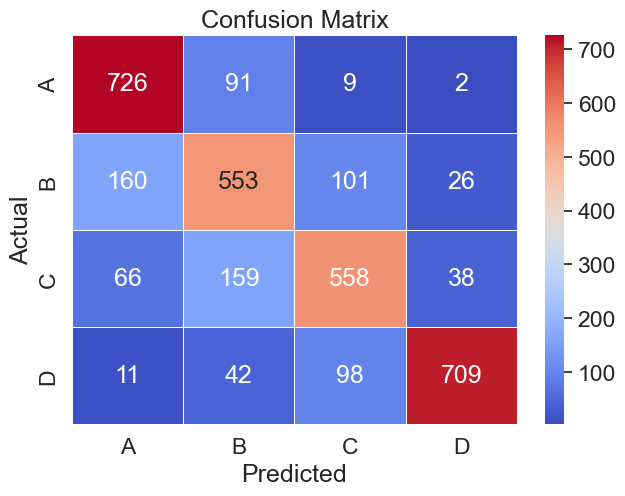

In [43]:
sns.set(font_scale = 1.5)
sns.heatmap(confusion_matrix(Y_test, xgb_pred), cmap = "coolwarm", annot = True, fmt = '.0f', linewidth = 0.5)
plt.xticks(ticks = (0.5, 1.5, 2.5, 3.5), labels = ('A', 'B', 'C', 'D'))
plt.yticks(ticks = (0.5, 1.5, 2.5, 3.5), labels = ('A', 'B', 'C', 'D'))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## `A` means the best body performance